In [1]:
import numpy as np
import pandas as pd
import random
import copy
import math
import matplotlib.pyplot as plt

# Analyzation of the costs
## 4.1 Regression trees - Region based

Lets take a look at the top 10 lowest cost features while splitting the data by regions into 5-folds..
We select the top 10 lowest cost features as it is important to look at the relationships that have the best predictions towards the hospitalisation given a feature.

In [2]:
costArrayRegionsTree = np.zeros([24,24,6])
for i in range(6):
    costArrayRegionsTree[:,:,i]= pd.read_csv(f"regressionTreeRegionsCostFold{i+1}.csv", sep=',',header=None)

mergedDataset = pd.read_csv("mergedDataset.csv", sep=',', header=None)
mergedDatasetData = mergedDataset.values

symptomsIndex = mergedDatasetData[0,2:mergedDatasetData.shape[1]-1]

for i, symptom in enumerate(symptomsIndex):
    symptomsIndex[i] = symptom[8:]

copyMergedDatasetData = copy.deepcopy(mergedDatasetData)

copyMergedDatasetData = np.delete(copyMergedDatasetData, 0, 0)
garbage, regionIndex = np.unique(copyMergedDatasetData.T[0], return_index=True)

regionSize = regionIndex.size
states=copyMergedDatasetData[regionIndex,0]


In [3]:
top10AllFolds= []
for index in range(6):
    sortedIndex = np.argsort(costArrayRegionsTree[:,:,index].flatten())
    sortedValue = np.sort(costArrayRegionsTree[:,:,index].flatten())
    #print(sortedIndex, sortedValue)
    top10 = []
    i=0
    while(len(top10)<10):
        if sortedValue[i]>0:
            slot = sortedIndex[i]
            x = slot%24
            y = int(slot/24)
            top10.append([sortedValue[i],np.array([x,y])])
        i+=1
    top10AllFolds.append(top10)

top10AllFolds = np.array(top10AllFolds)

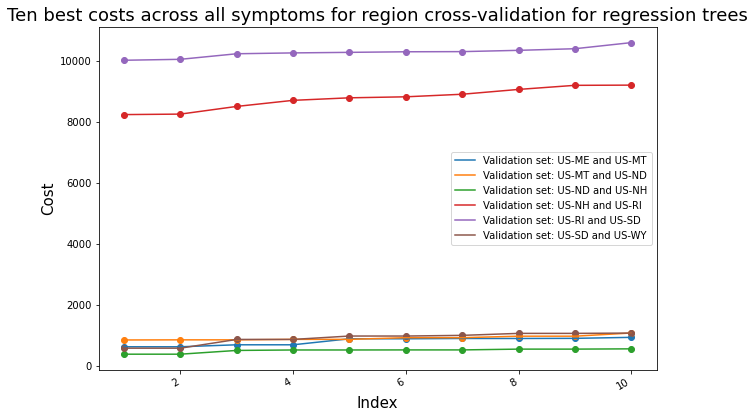

['US-ME', 'US-MT', 'US-RI', 'US-SD', 'US-WY']


In [4]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
for i in range(6):
    x_axis = np.arange(0,10)
    y_axis = top10AllFolds[i][:,0]
    plt.scatter(x_axis+1, y_axis)
    plt.plot(x_axis+1, y_axis, linestyle='solid')
    legend[i] = f"Validation set: {states[i]} and {states[i+1]}"
ax.legend(legend)  
plt.xlabel('Index',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.title("Ten best costs across all symptoms for region cross-validation for regression trees",fontsize=18)
plt.show()
statesCopy = states.copy().tolist()
statesCopy.remove(states[2])
statesCopy.remove(states[3])
print(statesCopy)

Let us use the first three training  for the purpose of analysis as it returned the best predictions.   But before let us analyse the data that was split through time.

## 4.2 Regression trees - Time based

In [5]:
costArrayTimeTree = np.zeros([24,24])

costArrayTimeTree[:,:]= pd.read_csv(f"regressionTreeDateCost.csv", sep=',',header=None)

In [6]:
sortedIndex = np.argsort(costArrayTimeTree[:,:].flatten())
sortedValue = np.sort(costArrayTimeTree[:,:].flatten())
#print(sortedIndex, sortedValue)
top10 = []
i=0
while(len(top10)<10):
    if sortedValue[i]>0:
        slot = sortedIndex[i]
        x = slot%24
        y = int(slot/24)
        top10.append([sortedValue[i],np.array([x,y])])
    i+=1
top10OverAllTrees = top10AllFolds.tolist()
top10OverAllTrees.append(top10)
top10 = np.array(top10)

top10Tree = top10.copy()
top10AllFoldsTree = top10AllFolds.copy()


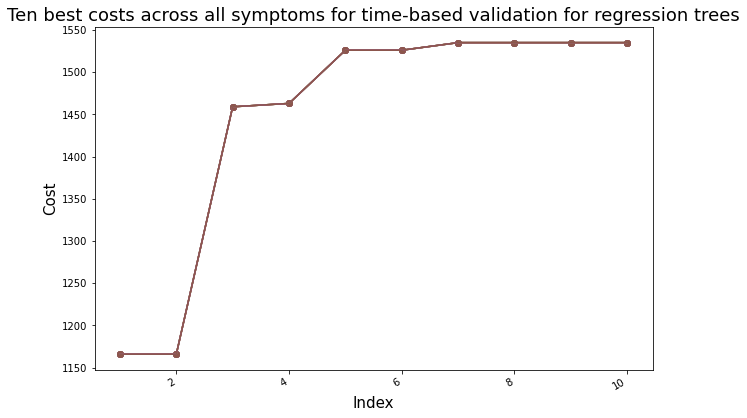

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
print()
for i in range(6):
    x_axis = np.arange(0,10)
   
    y_axis = top10[:,0]
    plt.scatter(x_axis+1, y_axis)
    plt.plot(x_axis+1, y_axis, linestyle='solid')
plt.xlabel('Index',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.title("Ten best costs across all symptoms for time-based validation for regression trees",fontsize=18)
plt.show()

### 4.3 Comparing the time split and region split regression trees

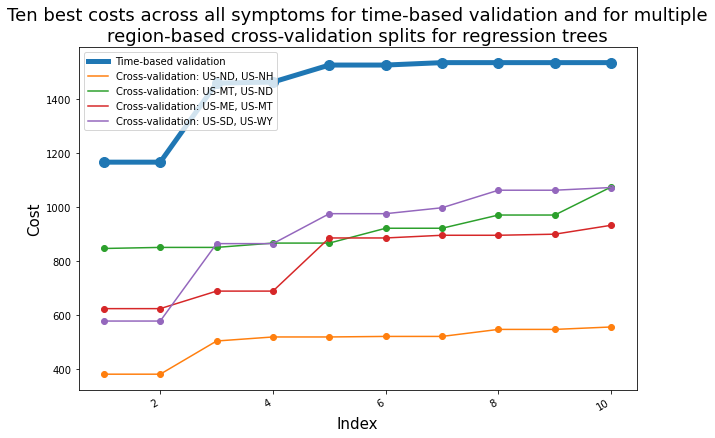

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
#for i in range(2):
x_axis = np.arange(0,10)
y_axis = top10Tree[:,0]
plt.scatter(x_axis+1, y_axis, s= 100)
plt.plot(x_axis+1, y_axis, linestyle='solid', linewidth = 5)
y_axis = top10AllFoldsTree[2][:,0]
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')
y_axis = top10AllFoldsTree[1][:,0]
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')
y_axis = top10AllFoldsTree[0][:,0]
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')
y_axis = top10AllFoldsTree[5][:,0]
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')

legend = ("Time-based validation","Cross-validation: US-ND, US-NH","Cross-validation: US-MT, US-ND","Cross-validation: US-ME, US-MT","Cross-validation: US-SD, US-WY")
ax.legend(legend)
plt.xlabel('Index',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.title("Ten best costs across all symptoms for time-based validation and for multiple\nregion-based cross-validation splits for regression trees",fontsize=18)
plt.show()

It appears that the region-based regression trees obtain the best training.

## 4.4 Common Symptoms
#### Let us analyse the symptoms that represent the highest rate of hospitalisations.

In [9]:
symptomList = (np.array(top10OverAllTrees).T[1]).flatten()
#print(symptomList)
symptomsCount = np.zeros(24)

for case in symptomList:
    for symp in case:
        symptomsCount[symp]+=1
        
total = np.sum(symptomsCount)
        
sortedIndex = np.argsort(symptomsCount)[::-1]

sortedValue = np.sort(symptomsCount)[::-1]
sortedValue = sortedValue/total*100
y_pos = np.arange(24)


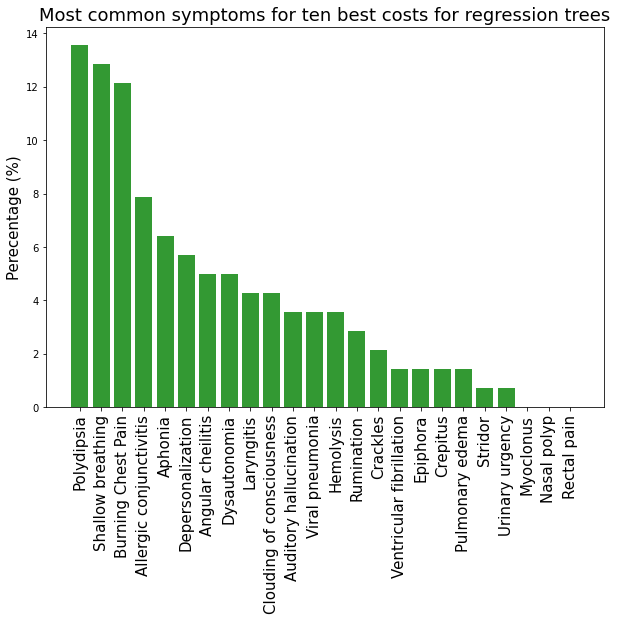

In [25]:
plt.figure(figsize=(10,7))
plt.bar(y_pos, sortedValue, align='center', color='green', alpha=0.8)
plt.xticks(y_pos, symptomsIndex[sortedIndex], rotation=90,fontsize=15)
plt.ylabel('Perecentage (%)',fontsize=15)
plt.title('Most common symptoms for ten best costs for regression trees',fontsize=18)
plt.show()

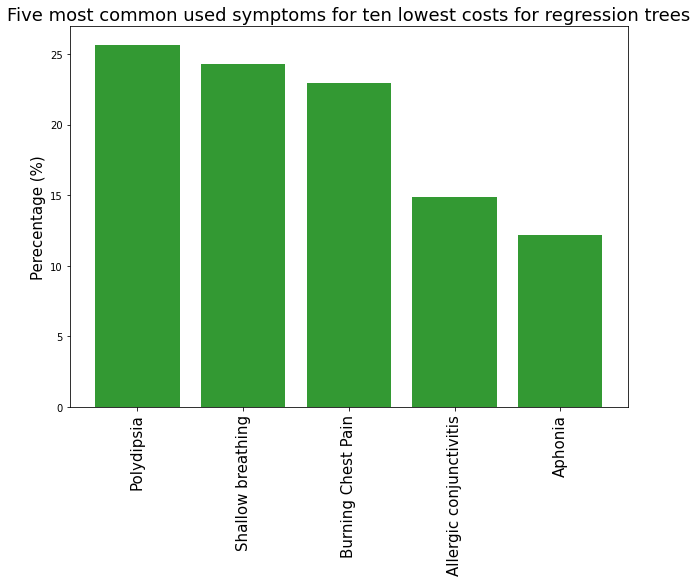

In [11]:
plt.figure(figsize=(10,7))
sortedValue = sortedValue[0:5]
total = sum(sortedValue)
sortedValue= sortedValue/total*100

plt.bar(y_pos[0:5], sortedValue, align='center',color='green',alpha=0.8)
plt.xticks(y_pos[0:5], symptomsIndex[sortedIndex][0:5],  rotation='vertical',fontsize=15)
plt.ylabel('Perecentage (%)',fontsize=15)
plt.title('Five most common used symptoms for ten lowest costs for regression trees',fontsize=18)
plt.show()

## 4.5 KNN - Region based

In [12]:
costArrayRegionsKNN = np.zeros([24,24,6])
for i in range(6):
    costArrayRegionsKNN[:,:,i]= pd.read_csv(f"KNNRegionsCostFold{i+1}.csv", sep=',',header=None)


In [13]:
top10AllFolds= []
for index in range(6):
    sortedIndex = np.argsort(costArrayRegionsKNN[:,:,index].flatten())
    sortedValue = np.sort(costArrayRegionsKNN[:,:,index].flatten())
    
    top10 = []
    i=0
    while(len(top10)<10):
        if sortedValue[i]>0:
            slot = sortedIndex[i]
            x = slot%24
            y = int(slot/24)
            top10.append([sortedValue[i],np.array([x,y])])
        i+=1
    top10AllFolds.append(top10)

top10AllFolds = np.array(top10AllFolds)

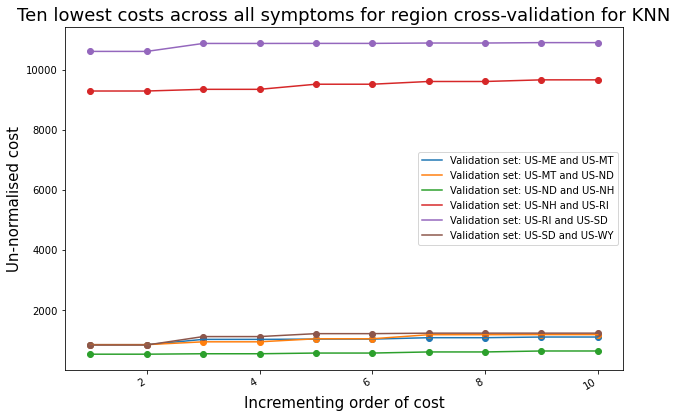

['US-ME', 'US-MT', 'US-RI', 'US-SD', 'US-WY']


In [14]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
for i in range(6):
    x_axis = np.arange(0,10)
    y_axis = top10AllFolds[i][:,0]
    plt.scatter(x_axis+1, y_axis)
    plt.plot(x_axis+1, y_axis, linestyle='solid')
    legend[i] = f"Validation set: {states[i]} and {states[i+1]}"
ax.legend(legend)  
plt.xlabel('Incrementing order of cost',fontsize=15)
plt.ylabel('Un-normalised cost',fontsize=15)
plt.title("Ten lowest costs across all symptoms for region cross-validation for KNN",fontsize=18)
plt.show()
statesCopy = states.copy().tolist()
statesCopy.remove(states[2])
statesCopy.remove(states[3])
print(statesCopy)

Let us use ['US-ME', 'US-MT', 'US-RI', 'US-SD', 'US-WY'] for the purpose of analysis as it returned the best predictions.   But before let us analyse the data that was split through time.

## 4.6 KNN - Time based

In [15]:
costArrayTimeKNN = np.zeros([24,24])

costArrayTimeKNN[:,:]= pd.read_csv(f"KNNDateCost.csv", sep=',',header=None)

In [16]:
sortedIndex = np.argsort(costArrayTimeKNN[:,:].flatten())
sortedValue = np.sort(costArrayTimeKNN[:,:].flatten())
#print(sortedIndex, sortedValue)
top10 = []
i=0
while(len(top10)<10):
    if sortedValue[i]>0:
        slot = sortedIndex[i]
        x = slot%24
        y = int(slot/24)
        top10.append([sortedValue[i],np.array([x,y])])
    i+=1
top10OverAllKNN = top10AllFolds.tolist()
top10OverAllKNN.append(top10)
top10 = np.array(top10)
top10KNN = top10.copy()
top10AllFoldsKNN = top10AllFolds.copy()


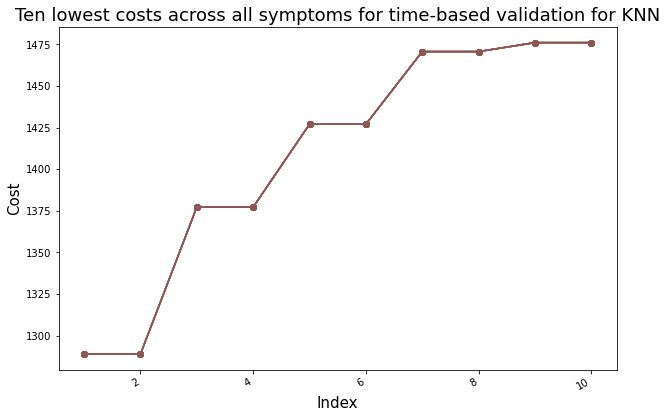

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
for i in range(6):
    x_axis = np.arange(0,10)
    y_axis = top10[:,0]
    plt.scatter(x_axis+1, y_axis)
    plt.plot(x_axis+1, y_axis, linestyle='solid')
plt.xlabel('Index',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.title("Ten lowest costs across all symptoms for time-based validation for KNN",fontsize=18)
plt.show()

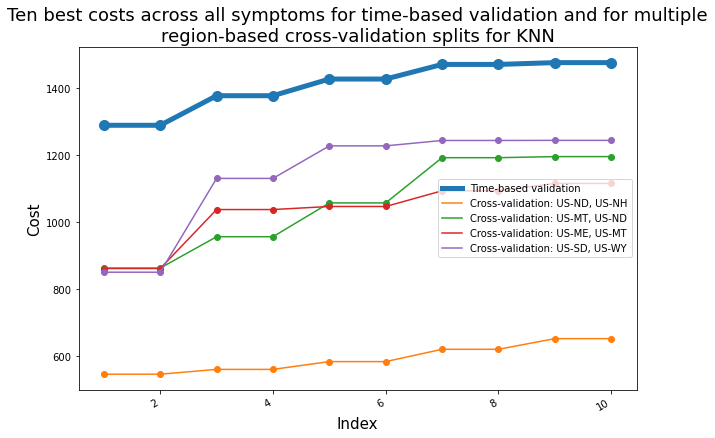

In [18]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
#for i in range(2):
x_axis = np.arange(0,10)
y_axis = top10KNN[:,0]
plt.scatter(x_axis+1, y_axis, s=100)
plt.plot(x_axis+1, y_axis, linestyle='solid',linewidth=5)
y_axis = top10AllFoldsKNN[2][:,0]
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')
y_axis = top10AllFoldsKNN[1][:,0]
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')
y_axis = top10AllFoldsKNN[0][:,0]
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')
y_axis = top10AllFoldsKNN[5][:,0]
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')
legend = ("Time-based validation","Cross-validation: US-ND, US-NH","Cross-validation: US-MT, US-ND","Cross-validation: US-ME, US-MT","Cross-validation: US-SD, US-WY")
ax.legend(legend, loc=7)
plt.xlabel('Index',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.title("Ten best costs across all symptoms for time-based validation and for multiple\nregion-based cross-validation splits for KNN",fontsize=18)
plt.show()

## 4.7 Common Symptoms
#### Let us analyse the symptoms that represent the highest rate of hospitalisations.

In [19]:
symptomList = (np.array(top10OverAllKNN).T[1]).flatten()
#print(symptomList)
symptomsCount = np.zeros(24)

for case in symptomList:
    for symp in case:
        symptomsCount[symp]+=1
        
total = np.sum(symptomsCount)
        
sortedIndex = np.argsort(symptomsCount)[::-1]

sortedValue = np.sort(symptomsCount)[::-1]
sortedValue = sortedValue/total*100
y_pos = np.arange(24)


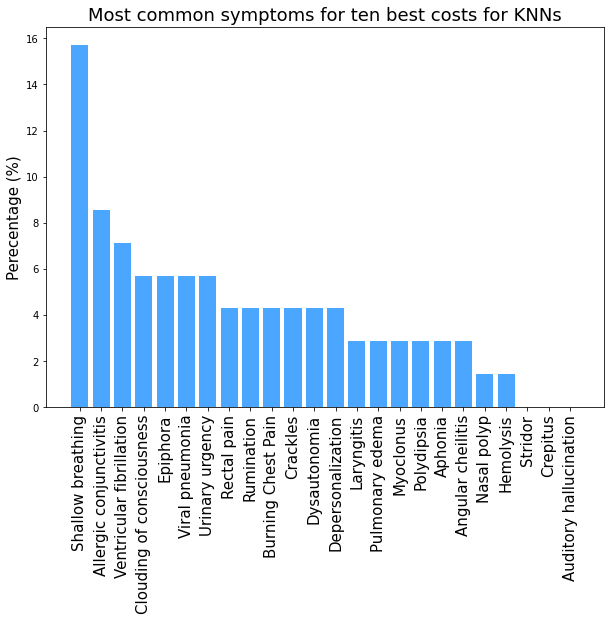

In [20]:
plt.figure(figsize=(10, 7))
plt.bar(y_pos, sortedValue, align='center', color='dodgerblue', alpha=0.8)
plt.xticks(y_pos, symptomsIndex[sortedIndex], rotation='vertical',fontsize=15)
plt.ylabel('Perecentage (%)',fontsize=15)
plt.title('Most common symptoms for ten best costs for KNNs',fontsize=18)
plt.show()

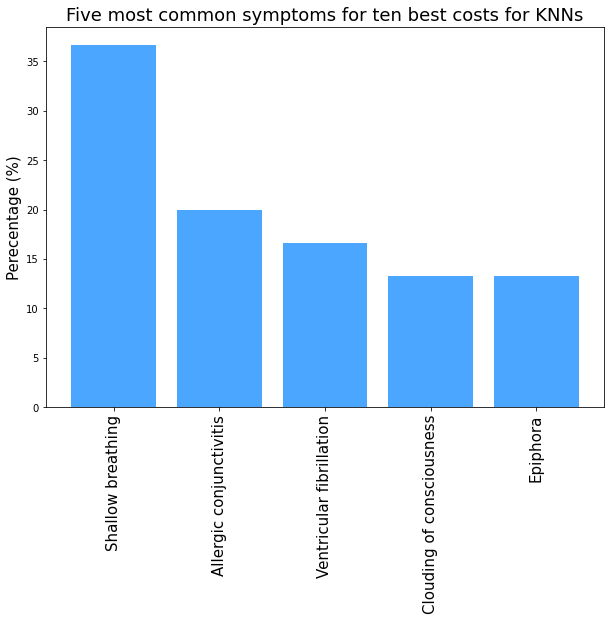

In [21]:
plt.figure(figsize=(10, 7))
sortedValue = sortedValue[0:5]
total = sum(sortedValue)
sortedValue= sortedValue/total*100

plt.bar(y_pos[0:5], sortedValue, align='center',color='dodgerblue',alpha=0.8)
plt.xticks(y_pos[0:5], symptomsIndex[sortedIndex][0:5],  rotation='vertical',fontsize=15)
plt.ylabel('Perecentage (%)',fontsize=15)
plt.title('Five most common symptoms for ten best costs for KNNs',fontsize=18)
plt.show()

## Comparing KNN and Regression trees

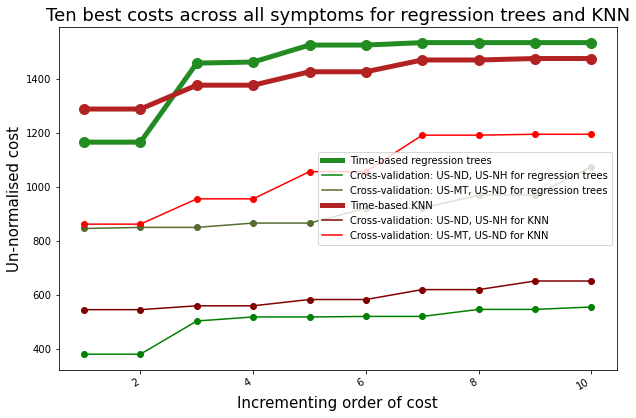

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
#for i in range(2):
x_axis = np.arange(0,10)

y_axis = top10Tree[:,0]
plt.scatter(x_axis+1, y_axis, color='forestgreen',s=100)
plt.plot(x_axis+1, y_axis, linestyle='solid', color='forestgreen', linewidth = 5)
y_axis = top10AllFoldsTree[2][:,0]
plt.scatter(x_axis+1, y_axis, color='green')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='green')
y_axis = top10AllFoldsTree[1][:,0]
plt.scatter(x_axis+1, y_axis, color='darkolivegreen')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='darkolivegreen')



y_axis = top10KNN[:,0]
plt.scatter(x_axis+1, y_axis, color='firebrick',s=100)
plt.plot(x_axis+1, y_axis, linestyle='solid', color='firebrick', linewidth = 5)
y_axis = top10AllFoldsKNN[2][:,0]
plt.scatter(x_axis+1, y_axis, color='maroon')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='maroon')
y_axis = top10AllFoldsKNN[1][:,0]
plt.scatter(x_axis+1, y_axis, color='red')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='red')
legend = ("Time-based regression trees","Cross-validation: US-ND, US-NH for regression trees","Cross-validation: US-MT, US-ND for regression trees","Time-based KNN","Cross-validation: US-ND, US-NH for KNN","Cross-validation: US-MT, US-ND for KNN")
ax.legend(legend)
plt.xlabel('Incrementing order of cost',fontsize=15)
plt.ylabel('Un-normalised cost',fontsize=15)
plt.title("Ten best costs across all symptoms for regression trees and KNN",fontsize=18)
plt.show()

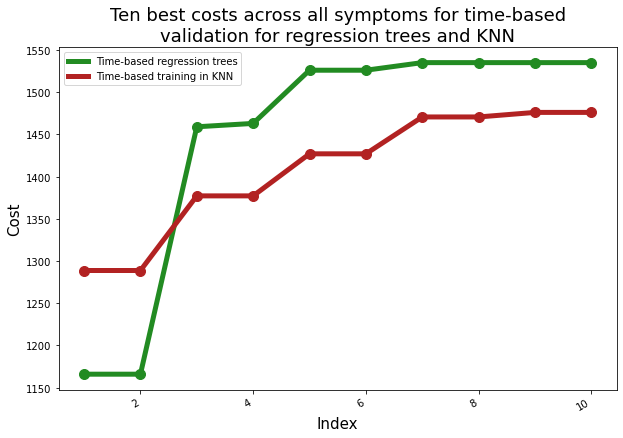

In [23]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
#for i in range(2):
x_axis = np.arange(0,10)

y_axis = top10Tree[:,0]
plt.scatter(x_axis+1, y_axis, color='forestgreen',s=100)
plt.plot(x_axis+1, y_axis, linestyle='solid', color='forestgreen', linewidth = 5)




y_axis = top10KNN[:,0]
plt.scatter(x_axis+1, y_axis, color='firebrick',s=100)
plt.plot(x_axis+1, y_axis, linestyle='solid', color='firebrick', linewidth = 5)

legend = ("Time-based regression trees","Time-based training in KNN")
ax.legend(legend)
plt.xlabel('Index',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.title("Ten best costs across all symptoms for time-based\nvalidation for regression trees and KNN",fontsize=18)
plt.show()

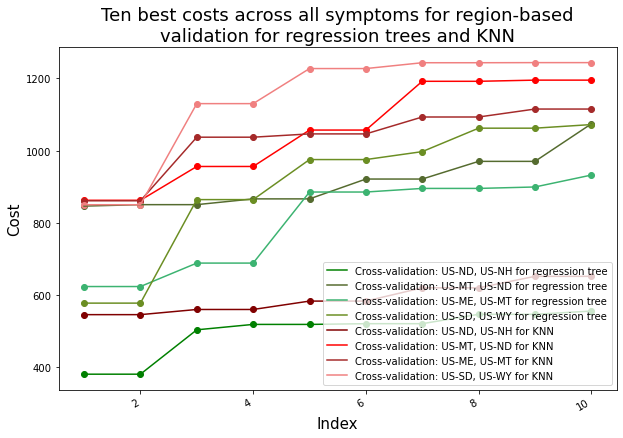

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
#for i in range(2):
x_axis = np.arange(0,10)

y_axis = top10AllFoldsTree[2][:,0]
plt.scatter(x_axis+1, y_axis, color='green')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='green')
y_axis = top10AllFoldsTree[1][:,0]
plt.scatter(x_axis+1, y_axis, color='darkolivegreen')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='darkolivegreen')
y_axis = top10AllFoldsTree[0][:,0]
plt.scatter(x_axis+1, y_axis, color='mediumseagreen')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='mediumseagreen')
y_axis = top10AllFoldsTree[5][:,0]
plt.scatter(x_axis+1, y_axis, color='olivedrab')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='olivedrab')

y_axis = top10AllFoldsKNN[2][:,0]
plt.scatter(x_axis+1, y_axis, color='maroon')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='maroon')
y_axis = top10AllFoldsKNN[1][:,0]
plt.scatter(x_axis+1, y_axis, color='red')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='red')
y_axis = top10AllFoldsKNN[0][:,0]
plt.scatter(x_axis+1, y_axis, color='brown')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='brown')
y_axis = top10AllFoldsKNN[5][:,0]
plt.scatter(x_axis+1, y_axis, color='lightcoral')
plt.plot(x_axis+1, y_axis, linestyle='solid', color='lightcoral')
legend = ("Cross-validation: US-ND, US-NH for regression tree","Cross-validation: US-MT, US-ND for regression tree","Cross-validation: US-ME, US-MT for regression tree","Cross-validation: US-SD, US-WY for regression tree","Cross-validation: US-ND, US-NH for KNN","Cross-validation: US-MT, US-ND for KNN","Cross-validation: US-ME, US-MT for KNN","Cross-validation: US-SD, US-WY for KNN")
ax.legend(legend)
plt.xlabel('Index',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.title("Ten best costs across all symptoms for region-based\nvalidation for regression trees and KNN",fontsize=18)
plt.show()